In [1]:
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader

from data.log_regression import Data
from models.logistic_regression import LogisticRegression
from visualization.loss_surface import PlotErrorSurfaces

In [2]:
torch.manual_seed(0)

In [3]:
data_set = Data()
model = LogisticRegression(n_inputs=1)

# Set the weight and bias
model.state_dict() ['linear.weight'].data[0] = torch.tensor([[0]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[0]])

# Near local minimum
# model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
# model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict({'linear.weight': tensor([[0.]]), 'linear.bias': tensor([0.])})


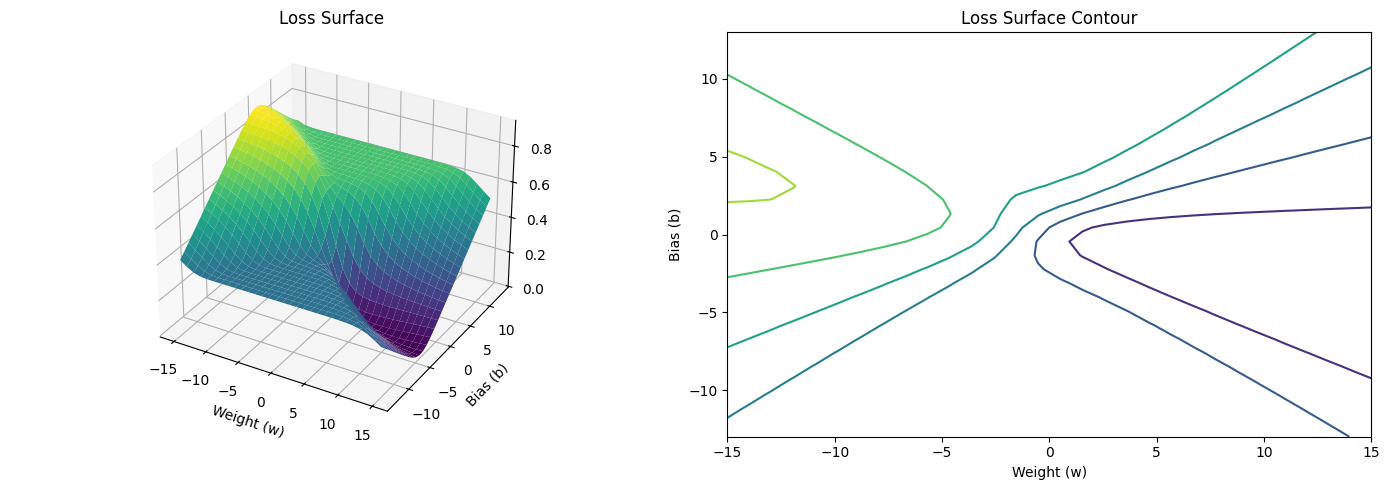

In [4]:
error_surface = PlotErrorSurfaces(
    w_range=15,
    b_range=13,
    X=data_set[:][0],
    Y=data_set[:][1],
    n_samples=30,
)

In [5]:
# Create dataloader object, crierion function and optimizer.
trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
def train_model(
        model: nn.Module, 
        trainloader: DataLoader,
        criterion: nn.Module,
        optimizer: torch.optim.Optimizer,
        get_surface: PlotErrorSurfaces,
        epochs=100,
        log_interval=20
    ):

    for epoch in range(epochs):
        for x, y in trainloader:
            # Forward pass
            yhat = model(x)
            loss = criterion(yhat, y)

            # Zero gradients, backpropagate, and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update loss surface with the new parameters
            get_surface.update_params(model, loss.item())

        # Plot the loss surface and predictions every `log_interval` epochs
        if epoch % log_interval == 0:
            get_surface.plot_update()
            print(f'Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}')


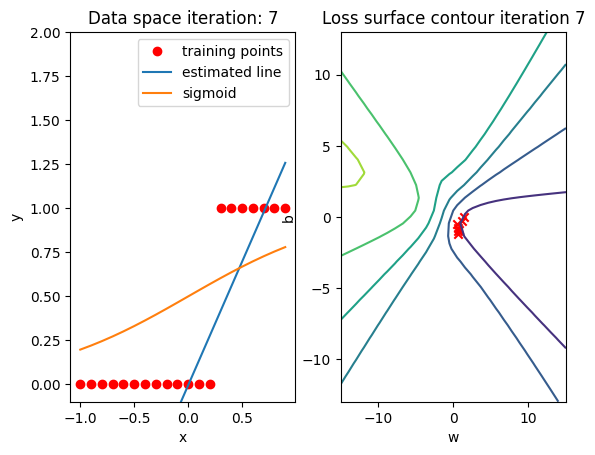

Epoch 0/100, Loss: 0.1163


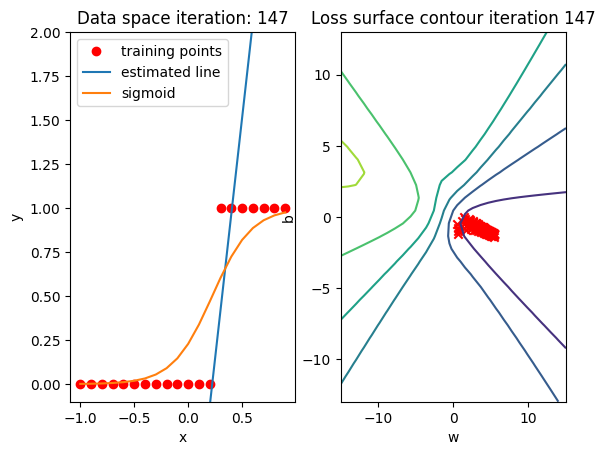

Epoch 20/100, Loss: 0.0012


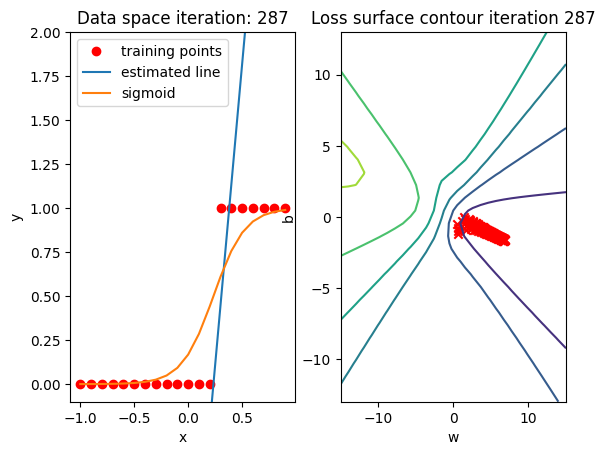

Epoch 40/100, Loss: 0.0003


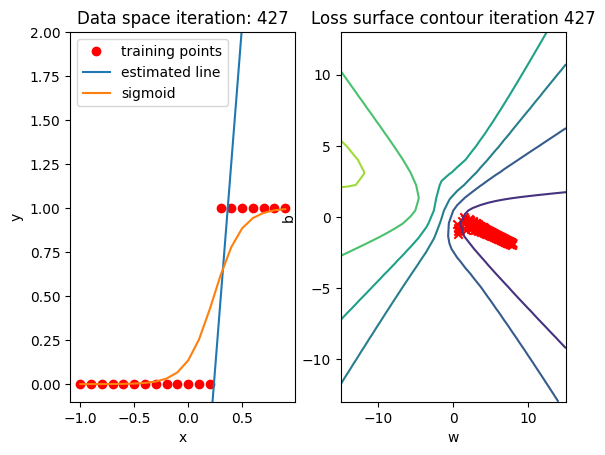

Epoch 60/100, Loss: 0.0001


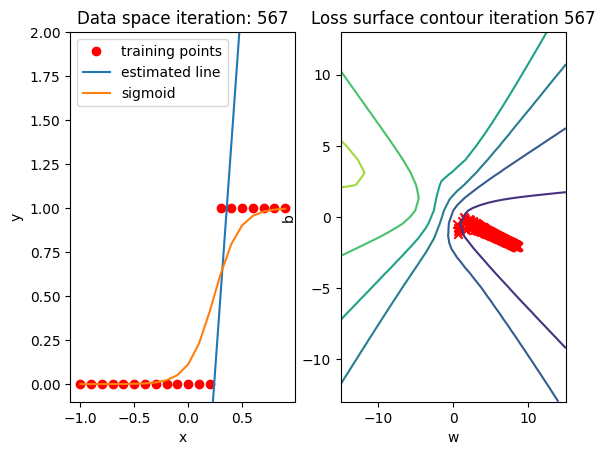

Epoch 80/100, Loss: 0.0000


In [7]:
train_model(
    model=model,
    trainloader=trainloader,
    criterion=criterion_rms,
    optimizer=optimizer,
    get_surface=error_surface,
)

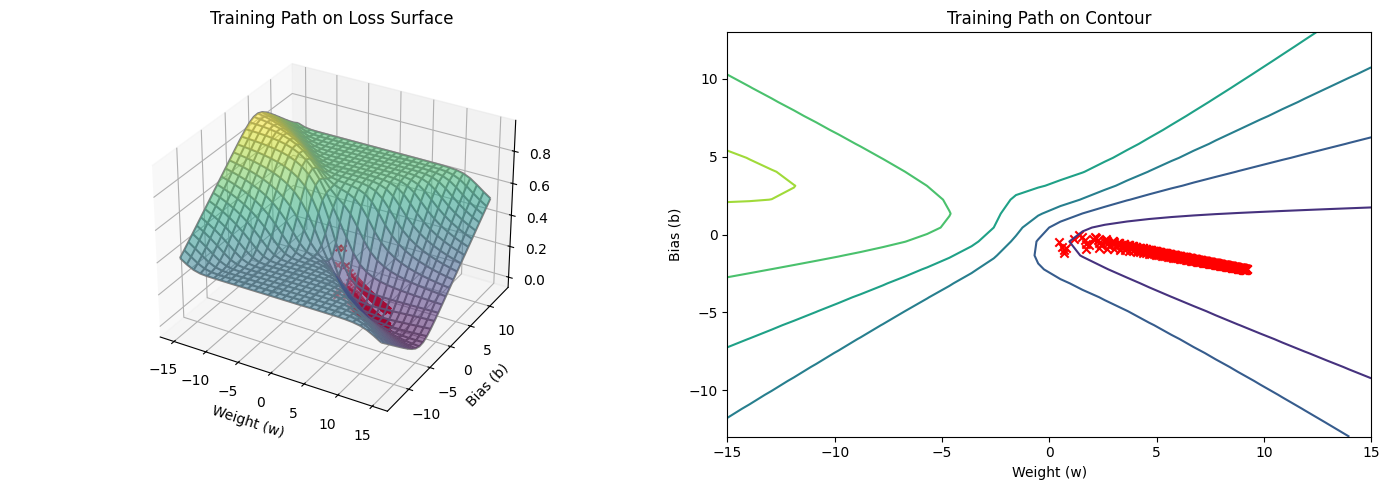

In [8]:
error_surface.final_plot()